In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_ta as ta

nifty_ticker = "^NSEI"
sensex_ticker = "^BSESN"

start_date = "2013-06-13"
end_date = "2024-07-20"

nifty_data = yf.download(nifty_ticker, start = start_date, end = end_date)
nifty_data.to_csv("nifty_data.csv")
nifty_data = pd.read_csv("nifty_data.csv")
print(nifty_data)

[*********************100%***********************]  1 of 1 completed

            Date          Open          High           Low         Close  \
0     2013-06-13   5709.350098   5729.850098   5683.100098   5699.100098   
1     2013-06-14   5748.950195   5819.399902   5739.399902   5808.399902   
2     2013-06-17   5820.399902   5854.899902   5770.250000   5850.049805   
3     2013-06-18   5841.899902   5863.399902   5804.299805   5813.600098   
4     2013-06-19   5805.750000   5828.399902   5777.899902   5822.250000   
...          ...           ...           ...           ...           ...   
2718  2024-07-12  24387.949219  24592.199219  24331.150391  24502.150391   
2719  2024-07-15  24587.599609  24635.050781  24522.750000  24586.699219   
2720  2024-07-16  24615.900391  24661.250000  24587.650391  24613.000000   
2721  2024-07-18  24543.800781  24837.750000  24504.449219  24800.849609   
2722  2024-07-19  24853.800781  24854.800781  24508.150391  24530.900391   

         Adj Close  Volume  
0      5699.100098  142000  
1      5808.399902  124400  


In [6]:
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'], format="%Y-%m-%d") 
nifty_data.set_index('Date', inplace=True)

In [7]:
print("Nifty Data Statistics:")
print(nifty_data['Close'].describe())

Nifty Data Statistics:
count     2723.000000
mean     12129.786030
std       4640.060927
min       5285.000000
25%       8379.525391
50%      10772.650391
75%      16288.424805
max      24800.849609
Name: Close, dtype: float64


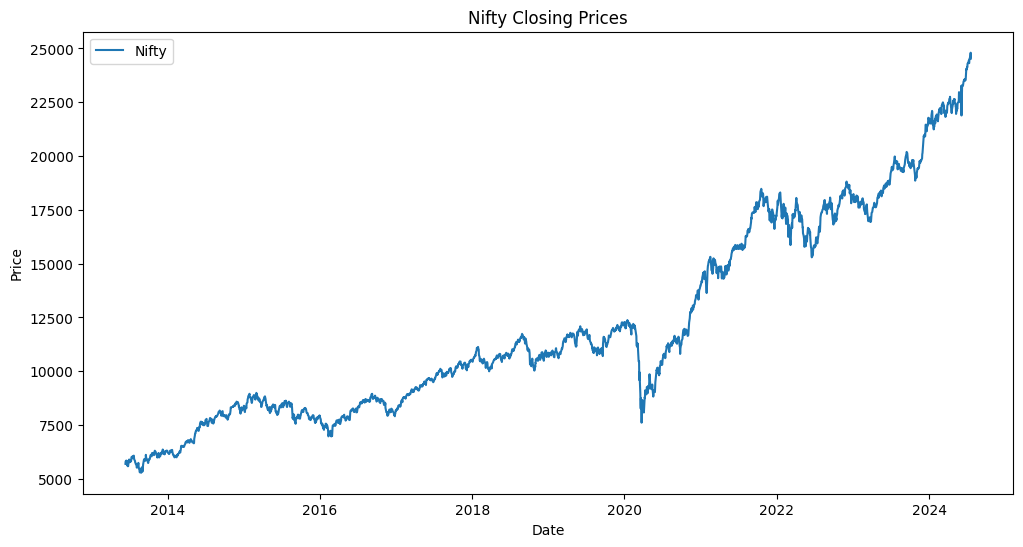

In [8]:
plt.figure(figsize = (12,6))
plt.plot(nifty_data['Close'], label = "Nifty")
plt.title("Nifty Closing Prices")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean()
print(nifty_data['SMA_50'])
nifty_data['SMA_200'] = nifty_data['Close'].rolling(window=200).mean()
print(nifty_data['SMA_200'])

Date
2013-06-13             NaN
2013-06-14             NaN
2013-06-17             NaN
2013-06-18             NaN
2013-06-19             NaN
                  ...     
2024-07-12    23183.290898
2024-07-15    23222.060898
2024-07-16    23264.803906
2024-07-18    23311.966914
2024-07-19    23356.534922
Name: SMA_50, Length: 2723, dtype: float64
Date
2013-06-13             NaN
2013-06-14             NaN
2013-06-17             NaN
2013-06-18             NaN
2013-06-19             NaN
                  ...     
2024-07-12    21626.540957
2024-07-15    21648.512705
2024-07-16    21670.911201
2024-07-18    21695.408447
2024-07-19    21719.351201
Name: SMA_200, Length: 2723, dtype: float64


In [10]:
nifty_data['EMA_12'] = nifty_data['Close'].ewm(span=12, adjust=False).mean()
print(nifty_data['EMA_12'])
nifty_data['EMA_26'] = nifty_data['Close'].ewm(span=26, adjust=False).mean()
print(nifty_data['EMA_26'])

Date
2013-06-13     5699.100098
2013-06-14     5715.915452
2013-06-17     5736.551506
2013-06-18     5748.405136
2013-06-19     5759.765884
                  ...     
2024-07-12    24212.165728
2024-07-15    24269.786265
2024-07-16    24322.588378
2024-07-18    24396.167029
2024-07-19    24416.895238
Name: EMA_12, Length: 2723, dtype: float64
Date
2013-06-13     5699.100098
2013-06-14     5707.196379
2013-06-17     5717.778115
2013-06-18     5724.876039
2013-06-19     5732.088925
                  ...     
2024-07-12    23847.478421
2024-07-15    23902.235517
2024-07-16    23954.884738
2024-07-18    24017.548802
2024-07-19    24055.574846
Name: EMA_26, Length: 2723, dtype: float64


In [11]:
nifty_data.ta.macd(close = 'Close', fast=12, slow=26, signal=9, append=True)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2013-06-13,NaN,NaN,NaN
2013-06-14,NaN,NaN,NaN
2013-06-17,NaN,NaN,NaN
2013-06-18,NaN,NaN,NaN
2013-06-19,NaN,NaN,NaN
...,...,...,...
2024-07-12,364.687307,0.572507,364.114800
2024-07-15,367.550748,2.748758,364.801990
2024-07-16,367.703640,2.321320,365.382320


In [12]:
nifty_data.ta.rsi(close='Close', length=14, append=True)

Date
2013-06-13          NaN
2013-06-14          NaN
2013-06-17          NaN
2013-06-18          NaN
2013-06-19          NaN
                ...    
2024-07-12    72.460097
2024-07-15    73.921509
2024-07-16    74.377006
2024-07-18    77.411690
2024-07-19    65.420695
Name: RSI_14, Length: 2723, dtype: float64

In [13]:
nifty_data = nifty_data.iloc[200:]
print(nifty_data)

                    Open          High           Low         Close  \
Date                                                                 
2014-04-07   6694.250000   6725.149902   6650.399902   6695.049805   
2014-04-09   6722.000000   6808.700195   6705.100098   6796.200195   
2014-04-10   6803.049805   6819.049805   6777.299805   6796.399902   
2014-04-11   6758.350098   6789.350098   6743.149902   6776.299805   
2014-04-15   6792.700195   6813.399902   6711.750000   6733.100098   
...                  ...           ...           ...           ...   
2024-07-12  24387.949219  24592.199219  24331.150391  24502.150391   
2024-07-15  24587.599609  24635.050781  24522.750000  24586.699219   
2024-07-16  24615.900391  24661.250000  24587.650391  24613.000000   
2024-07-18  24543.800781  24837.750000  24504.449219  24800.849609   
2024-07-19  24853.800781  24854.800781  24508.150391  24530.900391   

               Adj Close  Volume        SMA_50       SMA_200        EMA_12  \
Date       